In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
# from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [2]:
df = pd.read_csv('resultados/modelo.csv.zip')

/tmp/ipykernel_85247/3539471951.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('resultados/modelo.csv.zip')


In [3]:
df.fillna(0, inplace=True)

In [4]:
df.tipo_do_setor.value_counts()

    # 0 - Setor comum ou não especial
    # 1 -Setor especial de aglomerado subnormal
    # 2 - Setor especial quartéis, bases militares, etc.
    # 3 - Setor especial de alojamento, acampamentos, etc.
    # 4 - Setor especial de embarcações, barcos, navios, etc.
    # 5 - Setor especial de aldeia indígena
    # 6 - Setor especial de penitenciárias, colônias penais, presídios, cadeias, etc.
    # 7 - Setor especial de asilos, orfanatos, conventos, hospitais, etc.
    # 8 - Setor especial de projetos de assentamentos rurais


tipo_do_setor
0.0    290193
1.0     15815
8.0      2001
5.0      1211
7.0       475
6.0       315
2.0        58
3.0        49
4.0         3
Name: count, dtype: int64

In [5]:
# Fazendo um teste com RMSP
# RMSP é RM n. 20

In [6]:
rmsp = (df.rm == 20)
subnormal = (df.tipo_do_setor == 1)

In [7]:
# df.columns
df.loc[:, 'subnormal'] = 0

In [8]:
df.loc[subnormal, 'subnormal'] = 1

In [9]:
df.loc[rmsp].subnormal.value_counts()

subnormal
0    26709
1     3234
Name: count, dtype: int64

In [10]:
dimensoes = [
    'situacao_setor',
    'porcentagem_domicilios_sem_coleta_de_lixo',
    'porcentagem_domicilios_sem_ligacao_rede_de_agua',
    'porcentagem_domicilios_sem_banheiros',
    'porcentagem_domicilios_sem_esgoto_ou_fossa',
    # # 'porcentagem_domicilios_tipo_comodo',
    'porcentagem_domicilios_cedidos_outra_forma',
    'porcentagem_domicilios_em_outra_condicao_de_ocupacao',
    'numero_de_banheiros_por_habitante',
    'porcentagem_responsaveis_nao_alfabetizado',
    'porcentagem_responsaveis_nao_alfabetizado_com_menos_de_30_anos',
    'porcentagem_responsaveis_renda_ate_3_salarios',
    # # 'porcentagem_responsaveis_menos_8_anos_de_estudo',
    # # 'anos_medios_estudo_responsavel',
    'renda_media_responsavel',
    'numero_de_domicilios_particulares_permanentes',
    'numero_de_domicilios_improvisados',
    'numero_de_pessoas_residentes',
    'porcentagem_de_responsaveis_com_menos_30_anos',
    'numero_medio_pessoas',
    # 'area_do_setor',
    'densidade_populacional',
    'densidade_domicilios'
]

In [11]:
len(dimensoes)

19

In [12]:
x = df.loc[(rmsp) & (subnormal)]

In [13]:
x.shape

(3234, 33)

In [14]:
samples = df.loc[rmsp & (df.loc[rmsp].subnormal == 1)].shape[0]

In [15]:
x_ = df.loc[(rmsp) & (~subnormal)].sample(n=samples*2, random_state=51)

In [16]:
pd.concat([x, x_]).shape

(6468, 33)

In [17]:
X = pd.concat([x, x_]).loc[(rmsp), dimensoes]

In [18]:
y = pd.concat([x, x_]).loc[(rmsp), 'subnormal']

In [19]:
y.value_counts()

subnormal
1    3234
0    3234
Name: count, dtype: int64

In [20]:
# sns.pairplot(X, corner=True)

In [21]:
clf = LinearDiscriminantAnalysis(solver='lsqr')
clf.fit(X, y)

LinearDiscriminantAnalysis(solver='lsqr')

In [22]:
np.unique(clf.predict(X), return_counts=True)

(array([0, 1]), array([2949, 3519]))

In [23]:
clf.score(X, y)

0.8702844774273346

In [24]:
cf_matrix = confusion_matrix(y, clf.predict(X))

In [25]:
cf_matrix

array([[2672,  562],
       [ 277, 2957]])

<Axes: >

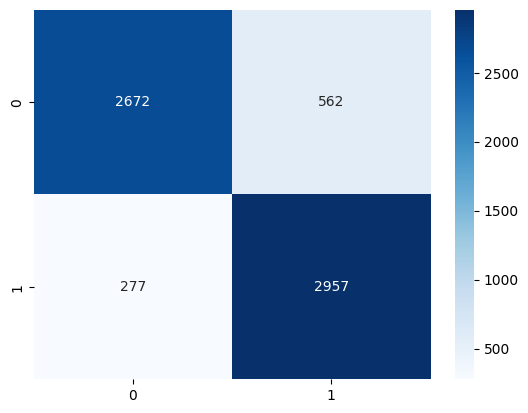

In [26]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='0', cmap='Blues')

In [27]:
clf.predict(df.loc[(rmsp), dimensoes])

array([0, 0, 0, ..., 1, 0, 1])

In [28]:
np.unique(clf.predict(df.loc[(rmsp), dimensoes]), return_counts=True)

(array([0, 1]), array([22458,  7485]))

In [29]:
# clf.get_params()

In [30]:
df.loc[(rmsp), 'predicted'] = clf.predict(df.loc[(rmsp), dimensoes])

In [31]:
df.loc[(rmsp) & (subnormal)]

,Cod_setor,cod_grande_regiao,uf,nome_UF,rm,nome_rm,meso_regiao,cod_municipio,nome_municipio,situacao_setor,...,renda_media_responsavel,numero_de_domicilios_particulares_permanentes,numero_de_domicilios_improvisados,numero_de_pessoas_residentes,porcentagem_de_responsaveis_com_menos_30_anos,numero_medio_pessoas,densidade_populacional,densidade_domicilios,subnormal,predicted
242228,355030803000112,3.0,35,SP1,20.0,RM São Paulo,3515.0,3550308.0,SÃO PAULO,1.0,...,1042.688679,102,4.0,376.0,0.198113,3.686275,0.036002,0.009767,1,1.0
242229,355030803000113,3.0,35,SP1,20.0,RM São Paulo,3515.0,3550308.0,SÃO PAULO,1.0,...,1429.807692,78,0.0,248.0,0.179487,3.179487,0.032539,0.010234,1,1.0
242230,355030803000114,3.0,35,SP1,20.0,RM São Paulo,3515.0,3550308.0,SÃO PAULO,1.0,...,2890.532086,373,1.0,1191.0,0.211230,3.193029,0.104252,0.032650,1,0.0
242231,355030803000115,3.0,35,SP1,20.0,RM São Paulo,3515.0,3550308.0,SÃO PAULO,1.0,...,1206.738710,310,0.0,1019.0,0.287097,3.287097,0.047381,0.014414,1,1.0
242232,355030803000116,3.0,35,SP1,20.0,RM São Paulo,3515.0,3550308.0,SÃO PAULO,1.0,...,862.845588,130,6.0,479.0,0.154412,3.684615,0.094330,0.025601,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305265,355280905000267,3.0,SP,SP2,20.0,RM São Paulo,3515.0,3552809.0,TABOÃO DA SERRA,1.0,...,1101.300000,230,0.0,868.0,0.169565,3.773913,0.019520,0.005172,1,1.0
305266,355280905000268,3.0,SP,SP2,20.0,RM São Paulo,3515.0,3552809.0,TABOÃO DA SERRA,1.0,...,1091.910345,290,0.0,1023.0,0.220690,3.527586,0.028032,0.007946,1,1.0
305267,355280905000269,3.0,SP,SP2,20.0,RM São Paulo,3515.0,3552809.0,TABOÃO DA SERRA,1.0,...,1510.217877,179,0.0,690.0,0.167598,3.854749,0.021757,0.005644,1,1.0
305268,355280905000270,3.0,SP,SP2,20.0,RM São Paulo,3515.0,3552809.0,TABOÃO DA SERRA,1.0,...,1314.503546,141,0.0,553.0,0.241135,3.921986,0.008531,0.002175,1,1.0


In [32]:
df.subnormal.value_counts()

subnormal
0    294305
1     15815
Name: count, dtype: int64